In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pysentani as sti

In [11]:
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')

In [12]:
# selecting only demand points that are households
survey = survey[survey['demand_point'] == 'household']

In [13]:
# renaming columns
survey.rename(columns={'app_now/rice_cooker': 'Rice Cooker',
                                 'app_now/TV': 'TV',
                                 'app_now/fridge': 'Fridge',
                                 'app_now/fan':'Fan',
                                 'app_now/lighting': 'Lighting',
                                 'app_now/radio': 'Radio',
                                 'HP_y_n': 'Mobile Phone',
                                 'access_type': 'Access Type'},
                                 inplace = True)

In [14]:
# pysentani access type function
survey['access_type'] = sti.access_type(survey)

# creating new dataframe that classifies each owned appliance by access type
subsurvey = survey[['access_type',
                   'Rice Cooker','TV','Fridge',
                   'Fan','Lighting','Radio',
                   'Mobile Phone']]

In [15]:
# grouping new dataframe of appliances into specific access types
analyzed = subsurvey.groupby('access_type').mean()
analyzed.transpose()

access_type,PLN_grid,PLN_microgrid,community_microgrid,no_access
Rice Cooker,0.278095,0.013333,0.137255,0.032520
TV,0.815238,0.840000,0.941176,0.817073
Fridge,0.306667,0.040000,0.019608,0.016260
Fan,0.144762,0.026667,0.098039,0.081301
Lighting,0.927619,0.960000,0.882353,0.898374
Radio,0.318095,0.293333,0.509804,0.447154
Mobile Phone,0.686924,0.774194,0.843137,0.756579


In [16]:
# creating variables for barplot graph
analyzed['access_type'] = analyzed.index
melted = pd.melt(analyzed, 
                 id_vars=['access_type'],
                 value_vars=['Rice Cooker','TV','Fridge',
                             'Fan','Lighting','Radio','Mobile Phone'],
                 value_name='Percent Ownership')

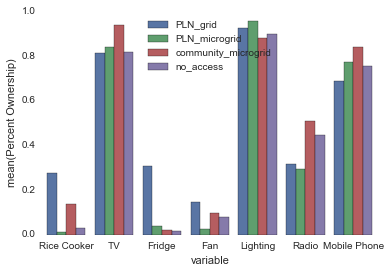

In [17]:
sns.barplot(x='variable', y='Percent Ownership', hue='access_type', data=melted)
plt.legend(loc='upper center',prop={'size':10})

In [18]:
subsurvey

,access_type,Rice Cooker,TV,Fridge,Fan,Lighting,Radio,Mobile Phone
0,no_access,0,1,0,0,0,1,1
1,no_access,0,1,0,0,1,1,1
2,no_access,0,1,0,0,0,0,0
3,no_access,0,1,0,0,1,0,1
4,no_access,0,0,0,0,1,0,1
5,no_access,0,1,0,0,1,0,1
6,no_access,0,1,0,0,1,0,1
7,no_access,NaN,NaN,NaN,NaN,NaN,NaN,0
8,no_access,0,0,0,0,1,1,1
9,no_access,0,1,0,0,0,1,0
